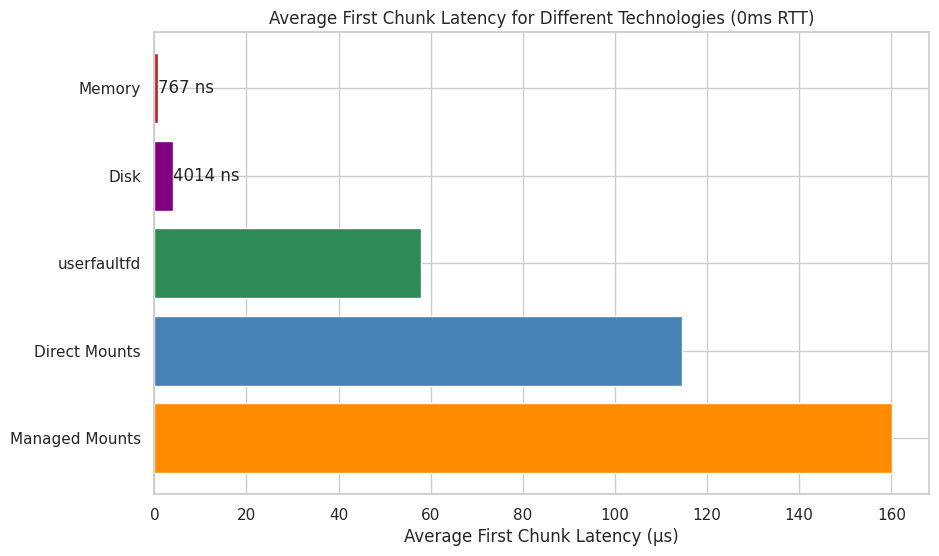

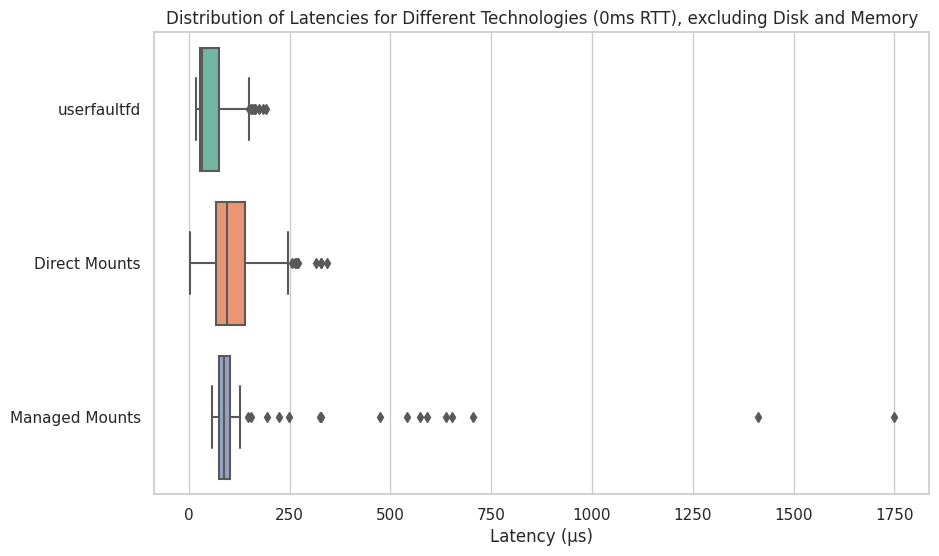

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided csv file
data = pd.read_csv('../bench/latency-first-chunk-rtt0/results.csv')

# Calculate the average for each technology
average_latencies = data.mean()

# Convert the series into a dataframe
average_latencies = average_latencies.reset_index()

# Rename the columns
average_latencies.columns = ['Technology', 'Average First Chunk Latency (0ms RTT) (ns)']

# Convert the latencies from nanoseconds to microseconds
average_latencies['Average First Chunk Latency (µs)'] = average_latencies['Average First Chunk Latency (0ms RTT) (ns)'] / 1e3

# Simplify the labels by removing everything before and including "for" and everything in parentheses
average_latencies['Technology'] = average_latencies['Technology'].apply(lambda x: x.split("for ")[-1].split(" (")[0])

# Sort the data from highest to lowest latency
average_latencies = average_latencies.sort_values(by='Average First Chunk Latency (µs)', ascending=False)

# Define a color palette
colors = ['darkorange', 'steelblue', 'seagreen', 'purple', 'firebrick']

# Create a horizontal bar plot with simplified labels
plt.figure(figsize=(10,6))
bars = plt.barh(average_latencies['Technology'], average_latencies['Average First Chunk Latency (µs)'], color=colors)

# Define a function to format the labels
def format_label(tech, latency_ns):
    if tech in ["Disk", "Memory"]:
        return f'{int(round(latency_ns))} ns'
    else:
        return None

# Add labels at the right end of each bar
for bar, tech, latency_ns in zip(bars, average_latencies['Technology'], average_latencies['Average First Chunk Latency (0ms RTT) (ns)']):
    label = format_label(tech, latency_ns)
    if label is not None:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, label, va='center')

plt.xlabel('Average First Chunk Latency (µs)')
plt.title('Average First Chunk Latency for Different Technologies (0ms RTT)')
plt.show()

# Exclude 'Disk' and 'Memory' from the data
data_excluding_disk_memory = data.drop(columns=['First Chunk Latency for Disk (0ms RTT) (ns)', 'First Chunk Latency for Memory (0ms RTT) (ns)'])

# Convert the latencies from nanoseconds to microseconds
data_excluding_disk_memory = data_excluding_disk_memory / 1e3

# Rename the columns for easier interpretation
data_excluding_disk_memory.columns = ['userfaultfd', 'Direct Mounts', 'Managed Mounts']

# Set a theme for the seaborn plot
sns.set_theme(style="whitegrid")

# Create a seaborn box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=data_excluding_disk_memory, orient="h", palette="Set2")
plt.xlabel('Latency (µs)')
plt.title('Distribution of Latencies for Different Technologies (0ms RTT), excluding Disk and Memory')
plt.show()